### Import the data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# import os

# os.listdir('/content/drive/MyDrive/Colab/')

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab/Epileptic Seizure Recognition.csv")

### Data Summary

In [ ]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [ ]:
data.shape

(11500, 180)

In [ ]:
data['y'].value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


### Coverting to Binary Classification

In the data, 1 means having seizure and (2,3,4,5) means having other brain activity. So, we replace (2,3,4,5) with 0.

0 means having no seizure

1 means having seizure.



In [ ]:
data['y'].replace((2,3,4,5),0, inplace=True)

In [ ]:
data['y'].value_counts()

,count
y,
0,9200
1,2300


Our data now has 2300 sample of seizure activity and 9200 samples of non-seizure activity.

In [ ]:
data

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,0
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,0
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,0
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,X22.V1.114,-22,-22,-23,-26,-36,-42,-45,-42,-45,...,15,16,12,5,-1,-18,-37,-47,-48,0
11496,X19.V1.354,-47,-11,28,77,141,211,246,240,193,...,-65,-33,-7,14,27,48,77,117,170,1
11497,X8.V1.28,14,6,-13,-16,10,26,27,-9,4,...,-65,-48,-61,-62,-67,-30,-2,-1,-8,0
11498,X10.V1.932,-40,-25,-9,-12,-2,12,7,19,22,...,121,135,148,143,116,86,68,59,55,0


### Separating Features and Target Vairables

We seperate the feature and target variable from the data so we create a variable X and y.

X holds the features

y holds the target

In [ ]:
X = data.drop(['Unnamed','y'],axis=1)
X

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [ ]:
y = data['y']
y

,y
0,0
1,1
2,0
3,0
4,0
...,...
11495,0
11496,1
11497,0
11498,0


In [ ]:
X.shape, y.shape

((11500, 178), (11500,))

In [ ]:
y.value_counts()

,count
y,
0,9200
1,2300


# Working on Imbalanced Data

Target variable y has imbalanced dataset

2300 Seizure samples
9200 Non Seizure samples

## Train Test Split

Now we split the X and y into test and training data to fit them to model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8050, 178), (3450, 178), (8050,), (3450,))

After splitting,

8050 Training data
3450 Test data

### Normalization

In [ ]:
X_train.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,...,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000,8050.000000
mean,-10.268199,-9.470559,-8.910435,-8.338882,-7.782360,-6.908075,-6.326708,-6.324969,-6.239255,-5.975776,...,-8.897516,-10.017640,-11.842484,-13.316646,-13.850559,-13.300621,-12.790683,-12.308820,-12.079379,-11.775404
std,162.966225,161.997908,159.371275,158.372744,159.300588,159.382942,160.320406,162.197463,162.174014,159.560463,...,166.775620,167.639106,168.966410,170.839924,169.602719,167.719272,165.759540,165.167791,165.046629,165.021727
min,-1741.000000,-1615.000000,-1741.000000,-1845.000000,-1791.000000,-1757.000000,-1471.000000,-1778.000000,-1840.000000,-1867.000000,...,-1860.000000,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000
25%,-53.000000,-53.000000,-53.000000,-53.000000,-52.000000,-52.000000,-52.000000,-53.000000,-53.000000,-53.000000,...,-54.000000,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000
50%,-7.000000,-7.000000,-7.000000,-7.000000,-8.000000,-8.500000,-8.000000,-7.000000,-7.000000,-6.000000,...,-8.000000,-9.000000,-10.000000,-11.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,35.000000,36.000000,37.000000,36.000000,35.000000,35.000000,35.750000,36.000000,37.000000,36.000000,...,36.000000,34.000000,33.000000,33.000000,33.000000,34.000000,34.000000,34.000000,35.000000,34.000000
max,1726.000000,1534.000000,1348.000000,1226.000000,1518.000000,1816.000000,2047.000000,2047.000000,2047.000000,2047.000000,...,2047.000000,1777.000000,1472.000000,1280.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000


In [ ]:
X_test.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
count,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,...,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000,3450.000000
mean,-14.645507,-14.273913,-13.166087,-11.019420,-8.540290,-7.226087,-6.911304,-7.532174,-7.301739,-6.617971,...,-10.902029,-10.444638,-11.135362,-12.072754,-13.244928,-13.509565,-13.638551,-13.629855,-13.234783,-13.176232
std,171.657946,175.149220,172.814322,167.841349,164.912916,165.803366,164.136715,161.956518,161.725730,162.484141,...,161.600238,157.488284,159.407090,163.116839,166.113259,166.198471,160.664163,157.486799,157.751098,164.475052
min,-1839.000000,-1838.000000,-1835.000000,-1687.000000,-1382.000000,-1743.000000,-1832.000000,-1501.000000,-1775.000000,-1862.000000,...,-1430.000000,-1554.000000,-1548.000000,-1300.000000,-1586.000000,-1575.000000,-1348.000000,-1443.000000,-1442.000000,-1479.000000
25%,-57.000000,-58.000000,-57.000000,-57.000000,-57.000000,-57.000000,-57.000000,-57.000000,-59.000000,-57.000000,...,-55.000000,-56.000000,-55.000000,-56.000000,-57.000000,-56.000000,-56.000000,-57.000000,-56.000000,-56.000000
50%,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,-8.000000,-9.000000,-10.000000,-9.000000,-9.000000,...,-10.000000,-9.000000,-10.000000,-10.000000,-10.000000,-9.000000,-8.000000,-9.000000,-10.000000,-9.000000
75%,34.000000,34.000000,34.000000,36.000000,37.000000,37.000000,35.000000,36.000000,36.000000,35.000000,...,34.000000,34.000000,34.000000,33.000000,34.000000,34.000000,34.000000,34.000000,33.000000,32.000000
max,1628.000000,1713.000000,1697.000000,1612.000000,1437.000000,1429.000000,1592.000000,1325.000000,1139.000000,1281.000000,...,1271.000000,1249.000000,1252.000000,1319.000000,1186.000000,1114.000000,1205.000000,1371.000000,1445.000000,1380.000000


In [ ]:
#import the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

#Fit the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


#Conver them back to dataframe
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#Update the original variable
# X_train = X_train_scaled_df
# X_test = X_test_scaled_df

Normalization did not improve the model performance rather it produced worse result

## Model Building

### Logistic Regression

We import the model and initialize it

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression(solver='lbfgs', max_iter=10000)

Fit the training data

In [ ]:
lg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_lg = lg.predict(X_test)

##### Helper Fuction to evaluate model performance

In [ ]:
def evaluate(y_pred):

    #import metrics
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt


    #Confusion Matrix
    plt.figure(figsize=(4, 3))
    cm  = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, cmap="Accent", fmt='d')
    plt.show()


    # Metrices
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)

    print("--- Classification Result ---")
    print(f"\nAccuracy: {accuracy*100:.2f}% ")
    print(f"\nPrecision: {precision*100:.2f}% ")
    print(f"\nRecall: {recall*100:.2f}% ")



#### Model Evaluation

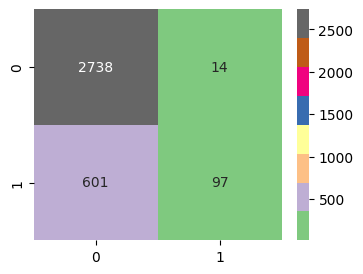

--- Classification Result ---

Accuracy: 82.17% 

Precision: 87.39% 

Recall: 13.90% 


In [ ]:
evaluate(y_lg)

### Random Forest

We import and initialize the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

Fitting the training data

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_rf = rf.predict(X_test)

#### Model Evaluation

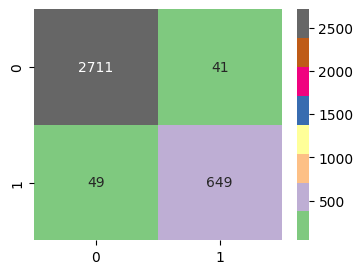

--- Classification Result ---

Accuracy: 97.39% 

Precision: 94.06% 

Recall: 92.98% 


In [ ]:
evaluate(y_rf)

#### Export and Load Model

In [ ]:
# import joblib

# joblib.dump(rf, 'rf.pkl')

In [ ]:
# loaded_model_rf = joblib.load('rf.pkl')
# loaded_model_rf

### XG Boost

We import the model and initialize it

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier()

Fit the training data

In [ ]:
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_xgbc = xgbc.predict(X_test)

#### Export and Load Model

Saving the Model

In [ ]:
# xgbc.save_model('xgbc.h5')

Loading the Model

In [ ]:
# import xgboost as xgb

# # Path to the saved model in Google Drive
# # model_path = '/content/drive/MyDrive/Colab/xgbc.h5'

# # Create an XGBClassifier object and load the model
# loaded_model = xgb.XGBClassifier()
# loaded_model.load_model('xgbc.h5')


#### Model Evaluation of XG Boost

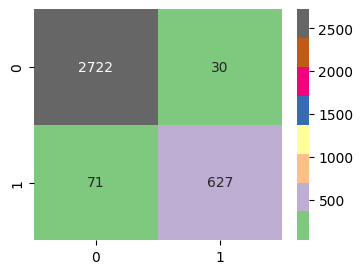

--- Classification Result ---

Accuracy: 97.07% 

Precision: 95.43% 

Recall: 89.83% 


In [ ]:
evaluate(y_xgbc)

### Tuned XG Boost

We find the best parameter for the XGBC Classifier usign Gridsearch and evaluate the model

In [ ]:
# from sklearn.model_selection import GridSearchCV

In [ ]:
# cv_params = {'max_depth': [1,4,10],
#              'min_child_weight': [1,3,5],
#              'learning_rate': [0.1, 0.2, 0.3],
#              'n_estimators': [75, 100, 125]
#              }

# scoring = ['accuracy', 'precision', 'recall', 'f1']

# xgbc_cv = GridSearchCV(xgbc, cv_params, scoring=scoring, cv=5, refit='recall')

In [ ]:
# %%time
# xgbc_cv.fit(X_train, y_train)

In [ ]:
# xgbc_cv.best_params_

Fitting the model with new found best parameters

In [ ]:
xgbc_tuned = XGBClassifier(learning_rate=0.2, max_depth=10, min_child_weight=5, n_estimators=125)

Fit the training data

In [ ]:
xgbc_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=125, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_xgbc_tuned =  xgbc_tuned.predict(X_test)

#### Model Evaluation of Tuned XG Boost

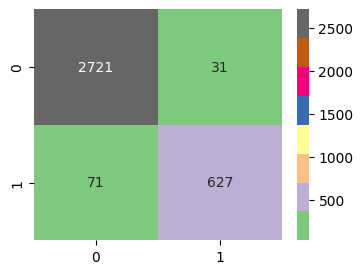

--- Classification Result ---

Accuracy: 97.04% 

Precision: 95.29% 

Recall: 89.83% 


In [ ]:
evaluate(y_xgbc_tuned)

It gave very similar result. In fact, the best params from the GridSearchCV gave one incorrect result in compare to base model.

### LSTM

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, LSTM, BatchNormalization, Dense

# callback = MyCallback()

# Define LSTM model
lstm = Sequential([
    LSTM(128, input_shape=(178, 1)),
    Dropout(0.5),

    Dense(64),
    Dropout(0.5),

    Dense(32),
    Dropout(0.5),

    Dense(16),
    Dropout(0.5),

    Dense(1, activation = 'sigmoid')
])

# Compile model
lstm.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                        │ (None, 128)                 │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_33 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_34 (Dropout)                 │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_35 (Dropout)                 │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 77,441 (302.50 KB)

 Trainable params: 77,441 (302.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
lstm.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 70s 266ms/step - accuracy: 0.7619 - loss: 0.8391 - val_accuracy: 0.9258 - val_loss: 0.2133
Epoch 2/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 83s 271ms/step - accuracy: 0.8945 - loss: 0.3130 - val_accuracy: 0.9383 - val_loss: 0.1556
Epoch 3/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 99s 341ms/step - accuracy: 0.9292 - loss: 0.2286 - val_accuracy: 0.9577 - val_loss: 0.1378
Epoch 4/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 124s 267ms/step - accuracy: 0.9473 - loss: 0.1593 - val_accuracy: 0.9638 - val_loss: 0.1076
Epoch 5/5
252/252 ━━━━━━━━━━━━━━━━━━━━ 81s 264ms/step - accuracy: 0.9491 - loss: 0.1643 - val_accuracy: 0.9687 - val_loss: 0.1082


#### Model Evaluation

In [ ]:
y_lstm = lstm.predict(X_test)
y_lstm = [1 if val > 0.5 else 0 for val in y_lstm]

108/108 ━━━━━━━━━━━━━━━━━━━━ 12s 99ms/step


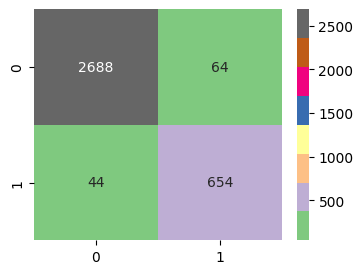

--- Classification Result ---

Accuracy: 96.87% 

Precision: 91.09% 

Recall: 93.70% 


In [ ]:
evaluate(y_lstm)

# Working on Balanced Data

## SMOTE

Our training data has 6448 instances of non-seizure reading and only 1602 instances of seizure reading so we try to balance the data using SMOTE. We need to generate 6448-1602 = 4846 new data.

Import the SMOTE library and initialize it

In [ ]:
from imblearn.combine import SMOTEENN
sm = SMOTEENN(random_state=42)

In [ ]:
X_bal_train, y_bal_train = sm.fit_resample(X_train, y_train)

Check the size of feature variable before and after SMOTE

In [ ]:
X_train.shape, X_bal_train.shape

((8050, 178), (12896, 178))

Check the size of target variable before and after SMOTE

In [ ]:
y_train.shape, y_bal_train.shape

((8050,), (12896,))

In [ ]:
y_bal_train.value_counts()

,count
y,
0,6448
1,6448


Before SMOTE,

X_train, y_train had 8050 data
1602 Seizure data and 6448 Non-Seizure data

After SMOTE,

X_bal_train, y_bal_train has 12896 data
6448 Seizure data and 6448 Non-Seizure data

## Model Building




### Logistic Regression

We import the model and initialize it

In [ ]:
from sklearn.linear_model import LogisticRegression
lg_bal = LogisticRegression(solver='lbfgs', max_iter=10000)

Fit the training data

In [ ]:
lg_bal.fit(X_bal_train,y_bal_train)

LogisticRegression(max_iter=10000)

In [ ]:
y_bal_lg = lg_bal.predict(X_test)

#### Model Evaluation

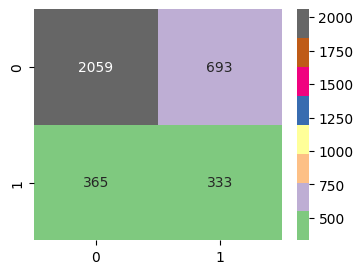

--- Classification Result ---

Accuracy: 69.33% 

Precision: 32.46% 

Recall: 47.71% 


In [ ]:
evaluate(y_bal_lg)

### Random Forest

We import and initialize the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_bal = RandomForestClassifier()

Fitting the training data

In [ ]:
rf_bal.fit(X_bal_train, y_bal_train)

RandomForestClassifier()

In [ ]:
y_bal_rf = rf_bal.predict(X_test)

#### Model Evaluation

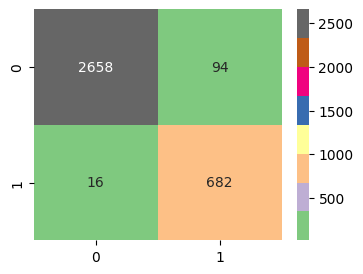

--- Classification Result ---

Accuracy: 96.81% 

Precision: 87.89% 

Recall: 97.71% 


In [ ]:
evaluate(y_bal_rf)

### XGBClassifier

We import the model and initialize it

In [ ]:
from xgboost import XGBClassifier
xgbc_bal = XGBClassifier()

Fit the training data

In [ ]:
xgbc_bal.fit(X_bal_train, y_bal_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_bal_xgbc = xgbc_bal.predict(X_test)

#### Model Evaluation

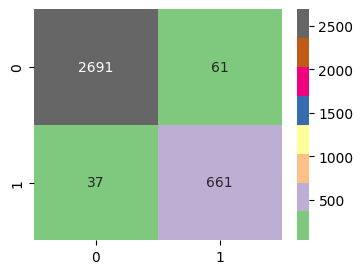

--- Classification Result ---

Accuracy: 97.16% 

Precision: 91.55% 

Recall: 94.70% 


In [ ]:
result_xg = evaluate(y_bal_xgbc)
result_xg

## LSTM

Setting the callback function to stop training if accuracy hits 99%

#### Callback

In [ ]:
# import tensorflow as tf

# class MyCallback(tf.keras.callbacks.Callback):
#   def on_epoch_end(self, epoch, logs={}):

#     print(f"Epoch {epoch + 1}:")
#     print(f" - Training Loss: {logs.get('loss')}")
#     print(f" - Training Accuracy: {logs.get('accuracy')}")
#     print(f" - Validation Loss: {logs.get('val_loss')}")
#     print(f" - Validation Accuracy: {logs.get('val_accuracy')}")

#     acc = logs.get('accuracy')
#     if(acc > 0.99):
#       print("\nReached 99% accuracy so cancelling training!")

#       model.stop_training = True



#### LSTM Model

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dropout, LSTM, BatchNormalization, Dense

# callback = MyCallback()

# Define LSTM model
lstm_bal = Sequential([
    LSTM(128, input_shape=(178, 1)),
    Dropout(0.5),

    Dense(128),
    Dropout(0.5),


    Dense(64),
    Dropout(0.5),

    Dense(64),
    Dropout(0.5),

    Dense(32),
    Dropout(0.5),

    Dense(32),
    Dropout(0.5),

    Dense(16),
    Dropout(0.5),

    Dense(1, activation = 'sigmoid')
])

# Compile model
lstm_bal.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
lstm_bal.fit(X_bal_train, y_bal_train, epochs=15, validation_data=(X_test, y_test))

Epoch 1/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 97s 232ms/step - accuracy: 0.5536 - loss: 1.6651 - val_accuracy: 0.8881 - val_loss: 0.2892
Epoch 2/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 141s 231ms/step - accuracy: 0.8095 - loss: 0.4740 - val_accuracy: 0.9055 - val_loss: 0.2360
Epoch 3/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 93s 230ms/step - accuracy: 0.8854 - loss: 0.3206 - val_accuracy: 0.9191 - val_loss: 0.2249
Epoch 4/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 143s 233ms/step - accuracy: 0.9070 - loss: 0.2952 - val_accuracy: 0.8064 - val_loss: 0.3662
Epoch 5/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 92s 229ms/step - accuracy: 0.9151 - loss: 0.2522 - val_accuracy: 0.9678 - val_loss: 0.1032
Epoch 6/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 92s 228ms/step - accuracy: 0.9434 - loss: 0.1894 - val_accuracy: 0.9133 - val_loss: 0.2245
Epoch 7/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - accuracy: 0.9519 - loss: 0.1662 - val_accuracy: 0.9670 - val_loss: 0.0993
Epoch 8/15
403/403 ━━━━━━━━━━━━━━━━━━━━ 92s 228ms/step - accuracy: 0.9522 - loss

#### Exporting and Loading Model

Saving the model in drive

In [ ]:
# lstm_bal.save('lstm_bal.keras')

Loading the model from drive

In [ ]:
# loaded_model = tf.keras.models.load_model('lstm_bal.keras')

In [ ]:
# loaded_model.summary()

#### Model Evaluation

In [ ]:
y_bal_lstm = lstm_bal.predict(X_test)
y_bal_lstm = [1 if val > 0.5 else 0 for val in y_bal_lstm]

108/108 ━━━━━━━━━━━━━━━━━━━━ 10s 90ms/step


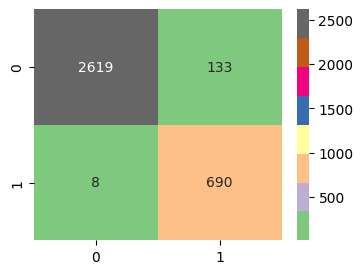

--- Classification Result ---

Accuracy: 95.91% 

Precision: 83.84% 

Recall: 98.85% 


In [ ]:
evaluate(y_bal_lstm)

The general pattern is the increase in recall and slight decrease in the precision value that is as expected in the binary classification.
Before balancing there were less positive in the data so model could not predict all the positives and when it did, it made sure it is correct but missed a lot of postives resulting in false negative prediction.

After balancing the data. model was able to find most of the positive but in the process it managed to mark negatives as postives resulting lots of false positives.